In [728]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [729]:
fundamental=pd.read_csv("fundamentals.csv")
securities = pd.read_csv('securities.csv')
sectors = securities['GICS Sector'].unique()

In [730]:
fundamental.shape

(1781, 79)

In [731]:
fundamental=fundamental.rename(columns={'Ticker Symbol': 'Ticker symbol'})

In [732]:
fundamental.head()

,Unnamed: 0,Ticker symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [733]:
fundamental_1=fundamental.copy()

In [734]:
fundamental_1=pd.merge(fundamental_1, securities, on='Ticker symbol', how='left')

In [735]:
fundamental_1.head(3)

,Unnamed: 0,Ticker symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,2012.0,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,2013.0,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,2014.0,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201


In [736]:
fundamental_1['For Year']=fundamental_1['Period Ending'].str.split("-",expand=True,)[0]

In [737]:
fundamental_1.columns

Index(['Unnamed: 0', 'Ticker symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

### focus on Profit measures

In [738]:
fundamental_2=fundamental_1.filter(['Ticker symbol', 'Period Ending','After Tax ROE','Gross Margin', 'Gross Profit',
                           'Net Income','Earnings Before Interest and Tax','Net Cash Flow','Total Revenue','Cost of Revenue',
                                    'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities','Operating Margin','For Year', 'Earnings Per Share','Security',
                                  'GICS Sector','GICS Sub Industry' ],axis=1)

In [739]:
fundamental_2[['Earnings Per Share']] = fundamental_2[['Earnings Per Share']].fillna(value=0)

In [740]:
fundamental_2['Period Ending']=pd.to_datetime(fundamental_2['Period Ending'])

In [741]:
cluster_15=fundamental_2[fundamental_2['For Year']=='2015']

In [742]:
cluster_15=cluster_15.drop(['Period Ending','For Year'],axis=1)

In [743]:
cluster_15.head()

,Ticker symbol,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,Earnings Per Share,Security,GICS Sector,GICS Sub Industry
3,AAL,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-6.040000e+08,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,11.39,American Airlines Group,Industrials,Airlines
6,AAP,25.0,45.0,4.453613e+09,4.938250e+08,8.548020e+08,-1.007800e+09,9.843861e+09,5.390248e+09,7.962358e+09,4.741040e+09,3.654416e+09,2.002912e+09,5.959446e+09,9.0,6.75,Advance Auto Parts,Consumer Discretionary,Automotive Retail
10,AAPL,45.0,40.0,9.362600e+10,5.339400e+10,7.251500e+10,7.276000e+09,2.337150e+11,1.400890e+11,2.903450e+11,8.937800e+10,8.061000e+10,1.193550e+11,1.709900e+11,30.0,9.28,Apple Inc.,Information Technology,Computer Hardware
15,ABBV,130.0,80.0,1.835900e+10,5.144000e+09,7.331000e+09,5.100000e+07,2.285900e+10,4.500000e+09,5.305000e+10,1.631400e+10,1.089400e+10,3.945000e+09,4.910500e+10,33.0,3.15,AbbVie,Health Care,Pharmaceuticals
18,ABC,22.0,3.0,3.529313e+09,-1.381650e+08,3.780000e+08,3.589290e+08,1.359618e+11,1.324325e+11,2.796298e+10,2.033449e+10,2.157823e+10,6.163860e+08,2.734660e+10,0.0,-0.62,AmerisourceBergen Corp,Health Care,Health Care Distributors


In [744]:
cluster_15.shape

(445, 19)

In [747]:
data_1=cluster_15.iloc[:,1:16]

In [748]:
data_1.head(4)

,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,Earnings Per Share
3,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-6.040000e+08,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,11.39
6,25.0,45.0,4.453613e+09,4.938250e+08,8.548020e+08,-1.007800e+09,9.843861e+09,5.390248e+09,7.962358e+09,4.741040e+09,3.654416e+09,2.002912e+09,5.959446e+09,9.0,6.75
10,45.0,40.0,9.362600e+10,5.339400e+10,7.251500e+10,7.276000e+09,2.337150e+11,1.400890e+11,2.903450e+11,8.937800e+10,8.061000e+10,1.193550e+11,1.709900e+11,30.0,9.28
15,130.0,80.0,1.835900e+10,5.144000e+09,7.331000e+09,5.100000e+07,2.285900e+10,4.500000e+09,5.305000e+10,1.631400e+10,1.089400e+10,3.945000e+09,4.910500e+10,33.0,3.15


In [749]:
company=cluster_15['Ticker symbol'].tolist()
company_name=cluster_15['Security'].tolist()

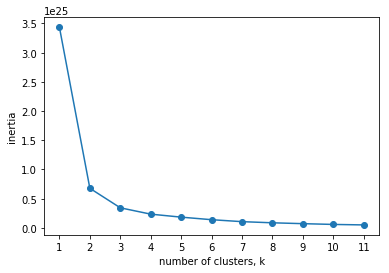

In [750]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data=data_1.values

ks = range(1, 12)
inertias = []
for k in ks:
 # Create a KMeans instance with k clusters: kmeans2
 kmeans = KMeans(n_clusters=k)

 # Fit model to X
 kmeans.fit(data)

 # Append the inertia to the list of inertias
 inertias.append(kmeans.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [751]:
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=11)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(data)
labels=pipeline.predict(data)

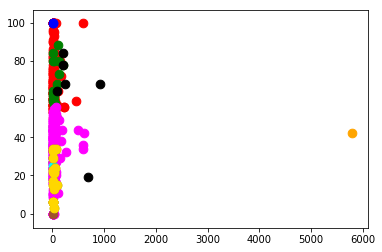

In [752]:
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 75, 
            c = 'red', label = 'Cluster1')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 75, 
            c = 'blue', label = 'Cluster2')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 75, 
            c = 'green', label = 'Cluster3')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 75, 
            c = 'yellow', label = 'Cluster4')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 75, 
            c = 'black', label = 'Cluster5')
plt.scatter(data[labels == 5, 0], data[labels == 5, 1], s = 75, 
            c = 'orange', label = 'Cluster6')
plt.scatter(data[labels == 6, 0], data[labels == 6, 1], s = 75, 
            c = 'magenta', label = 'Cluster7')
plt.scatter(data[labels == 7, 0], data[labels == 7, 1], s = 75, 
            c = 'cyan', label = 'Cluster8')
plt.scatter(data[labels == 8, 0], data[labels == 8, 1], s = 75, 
            c = 'sienna', label = 'Cluster9')
plt.scatter(data[labels == 9, 0], data[labels == 9, 1], s = 75, 
            c = 'olive', label = 'Cluster10')
plt.scatter(data[labels == 9, 0], data[labels == 9, 1], s = 75, 
            c = 'gold', label = 'Cluster10')

In [753]:
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

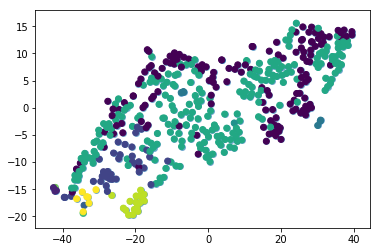

In [754]:
from sklearn.manifold import TSNE


model = TSNE(learning_rate=100)

#scaled = standardize(df) from question 1

tsne_features = model.fit_transform(data)

xs = tsne_features[:,0]


ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
#for x, y, company in zip(xs, ys, company):
    
    #plt.annotate(company, (x, y), fontsize=20, alpha=1)
#plt.figure(figsize=(30,30))
#plt.show()

#plt.scatter(xs, ys, c=labels) we are using labels that we got from running the Kmeans on the data scaled
plt.scatter(xs, ys,c=labels)
plt.show()

In [755]:
clusters=list(zip(company,labels))
sorted(clusters, key = lambda x: x[1])

[('ADBE', 0),
 ('ADI', 0),
 ('ADSK', 0),
 ('AEP', 0),
 ('AIV', 0),
 ('AJG', 0),
 ('AKAM', 0),
 ('ALK', 0),
 ('ALXN', 0),
 ('AMG', 0),
 ('AMP', 0),
 ('AMT', 0),
 ('AON', 0),
 ('APC', 0),
 ('ATVI', 0),
 ('AVB', 0),
 ('AVGO', 0),
 ('AWK', 0),
 ('BCR', 0),
 ('BIIB', 0),
 ('BK', 0),
 ('BMY', 0),
 ('BSX', 0),
 ('BXP', 0),
 ('CCI', 0),
 ('CELG', 0),
 ('CERN', 0),
 ('CL', 0),
 ('CME', 0),
 ('COG', 0),
 ('COO', 0),
 ('CRM', 0),
 ('CSX', 0),
 ('CTL', 0),
 ('CTXS', 0),
 ('CXO', 0),
 ('DISCA', 0),
 ('DISCK', 0),
 ('DLR', 0),
 ('DNB', 0),
 ('DPS', 0),
 ('EA', 0),
 ('EBAY', 0),
 ('EFX', 0),
 ('EL', 0),
 ('EOG', 0),
 ('EQIX', 0),
 ('EQR', 0),
 ('EQT', 0),
 ('ESS', 0),
 ('ETFC', 0),
 ('EW', 0),
 ('EXPE', 0),
 ('EXR', 0),
 ('FCX', 0),
 ('FE', 0),
 ('FFIV', 0),
 ('FRT', 0),
 ('FTR', 0),
 ('GGP', 0),
 ('GPN', 0),
 ('GRMN', 0),
 ('HAS', 0),
 ('HCA', 0),
 ('HCN', 0),
 ('HCP', 0),
 ('HES', 0),
 ('HOLX', 0),
 ('HRB', 0),
 ('HST', 0),
 ('IDXX', 0),
 ('INTU', 0),
 ('IPG', 0),
 ('IRM', 0),
 ('ISRG', 0),
 ('IVZ'

In [756]:
from scipy.cluster.hierarchy import fcluster
#Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(data, method='ward')
plt.figure(figsize=(20,20))
labels7 = fcluster(mergings, 0.7, criterion='distance')
# Plot the dendrogram, using varieties as labels
#dendrogram(mergings,
           #labels=returns.index,
           #leaf_rotation=90,
           #leaf_font_size=9,)

#plt.show()

<Figure size 1440x1440 with 0 Axes>

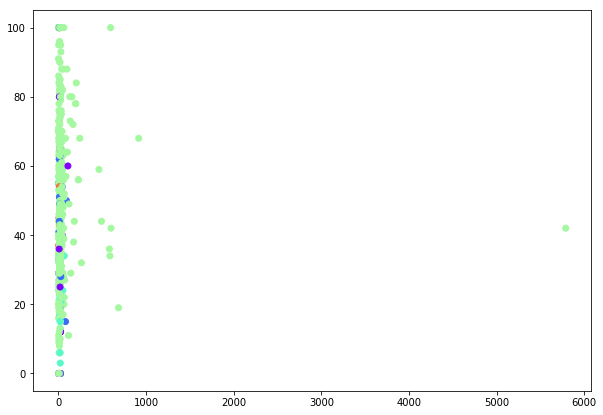

In [793]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### Try Clustering with PCA

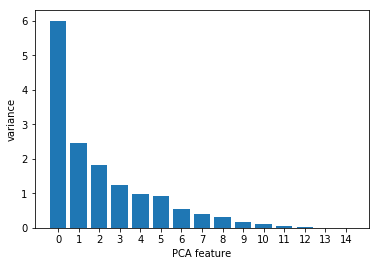

In [758]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [759]:

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_
c_names = ['F1','F2','F3','F4']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
39.9%:    -0.03 * F1 + -0.06 * F2 +  0.35 * F3 +  0.35 * F4
16.3%:    -0.02 * F1 +  0.12 * F2 + -0.07 * F3 +  0.08 * F4
12.1%:     0.19 * F1 +  0.24 * F2 +  0.15 * F3 + -0.18 * F4
 8.3%:     0.07 * F1 + -0.67 * F2 + -0.24 * F3 + -0.17 * F4
 6.5%:     0.97 * F1 + -0.07 * F2 +  0.02 * F3 +  0.05 * F4
 6.2%:     0.11 * F1 +  0.41 * F2 + -0.05 * F3 +  0.20 * F4
 3.7%:    -0.01 * F1 +  0.26 * F2 +  0.25 * F3 + -0.14 * F4
 2.6%:    -0.07 * F1 + -0.41 * F2 +  0.13 * F3 +  0.43 * F4
 2.1%:    -0.03 * F1 + -0.07 * F2 + -0.27 * F3 + -0.15 * F4
 1.1%:     0.00 * F1 +  0.23 * F2 + -0.64 * F3 +  0.25 * F4
 0.7%:     0.03 * F1 +  0.08 * F2 + -0.44 * F3 +  0.12 * F4
 0.4%:     0.00 * F1 +  0.01 * F2 + -0.06 * F3 +  0.04 * F4
 0.1%:     0.00 * F1 + -0.01 * F2 +  0.08 * F3 +  0.67 * F4
 0.0%:    -0.00 * F1 +  0.01 * F2 + -0.17 * F3 +  0.14 * F4
 0.0%:    -0.00 * F1 +  0.00 * F2 + -0.00 * F3 +  0.00 * F4


In [760]:
# Import PCA
from sklearn.decomposition import PCA



stscaler = StandardScaler().fit(data)
scaled = stscaler.transform(data)
# Create a PCA instance with 5 components: pca
pca = PCA(n_components=5)

# Fit the PCA instance to the scaled samples
pca.fit(scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled)

# Print the shape of pca_features
print(pca_features.shape)

(445, 5)


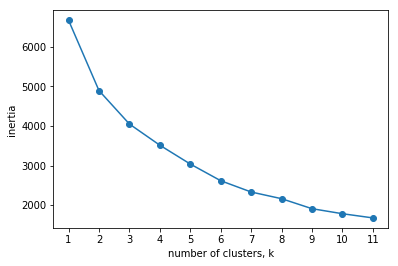

In [761]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ks = range(1, 12)
inertias = []
for k in ks:
 # Create a KMeans instance with k clusters: kmeans2
 kmeans = KMeans(n_clusters=k)

 # Fit model to X
 kmeans.fit(scaled)

 # Append the inertia to the list of inertias
 inertias.append(kmeans.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [762]:
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=10)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(scaled)
labels=pipeline.predict(scaled)

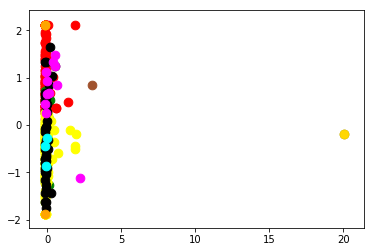

In [763]:
plt.scatter(scaled[labels == 0, 0], scaled[labels == 0, 1], s = 75, 
            c = 'red', label = 'Cluster1')
plt.scatter(scaled[labels == 1, 0], scaled[labels == 1, 1], s = 75, 
            c = 'blue', label = 'Cluster2')
plt.scatter(scaled[labels == 2, 0], scaled[labels == 2, 1], s = 75, 
            c = 'green', label = 'Cluster3')
plt.scatter(scaled[labels == 3, 0], scaled[labels == 3, 1], s = 75, 
            c = 'yellow', label = 'Cluster4')
plt.scatter(scaled[labels == 4, 0], scaled[labels == 4, 1], s = 75, 
            c = 'black', label = 'Cluster5')
plt.scatter(scaled[labels == 5, 0], scaled[labels == 5, 1], s = 75, 
            c = 'orange', label = 'Cluster6')
plt.scatter(scaled[labels == 6, 0], scaled[labels == 6, 1], s = 75, 
            c = 'magenta', label = 'Cluster7')
plt.scatter(scaled[labels == 7, 0], scaled[labels == 7, 1], s = 75, 
            c = 'cyan', label = 'Cluster8')
plt.scatter(scaled[labels == 8, 0], scaled[labels == 8, 1], s = 75, 
            c = 'sienna', label = 'Cluster9')
plt.scatter(scaled[labels == 9, 0], scaled[labels == 9, 1], s = 75, 
            c = 'olive', label = 'Cluster10')
plt.scatter(scaled[labels == 9, 0], scaled[labels == 9, 1], s = 75, 
            c = 'gold', label = 'Cluster10')

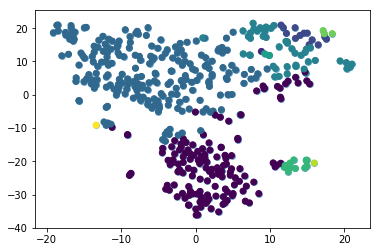

In [764]:
from sklearn.manifold import TSNE


model = TSNE(learning_rate=100)

#scaled = standardize(df) from question 1

tsne_features = model.fit_transform(scaled)

xs = tsne_features[:,0]


ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
#for x, y, company in zip(xs, ys, company):
    
    #plt.annotate(company, (x, y), fontsize=20, alpha=1)
#plt.figure(figsize=(30,30))
#plt.show()

#plt.scatter(xs, ys, c=labels) we are using labels that we got from running the Kmeans on the data scaled
plt.scatter(xs, ys,c=labels)
plt.show()

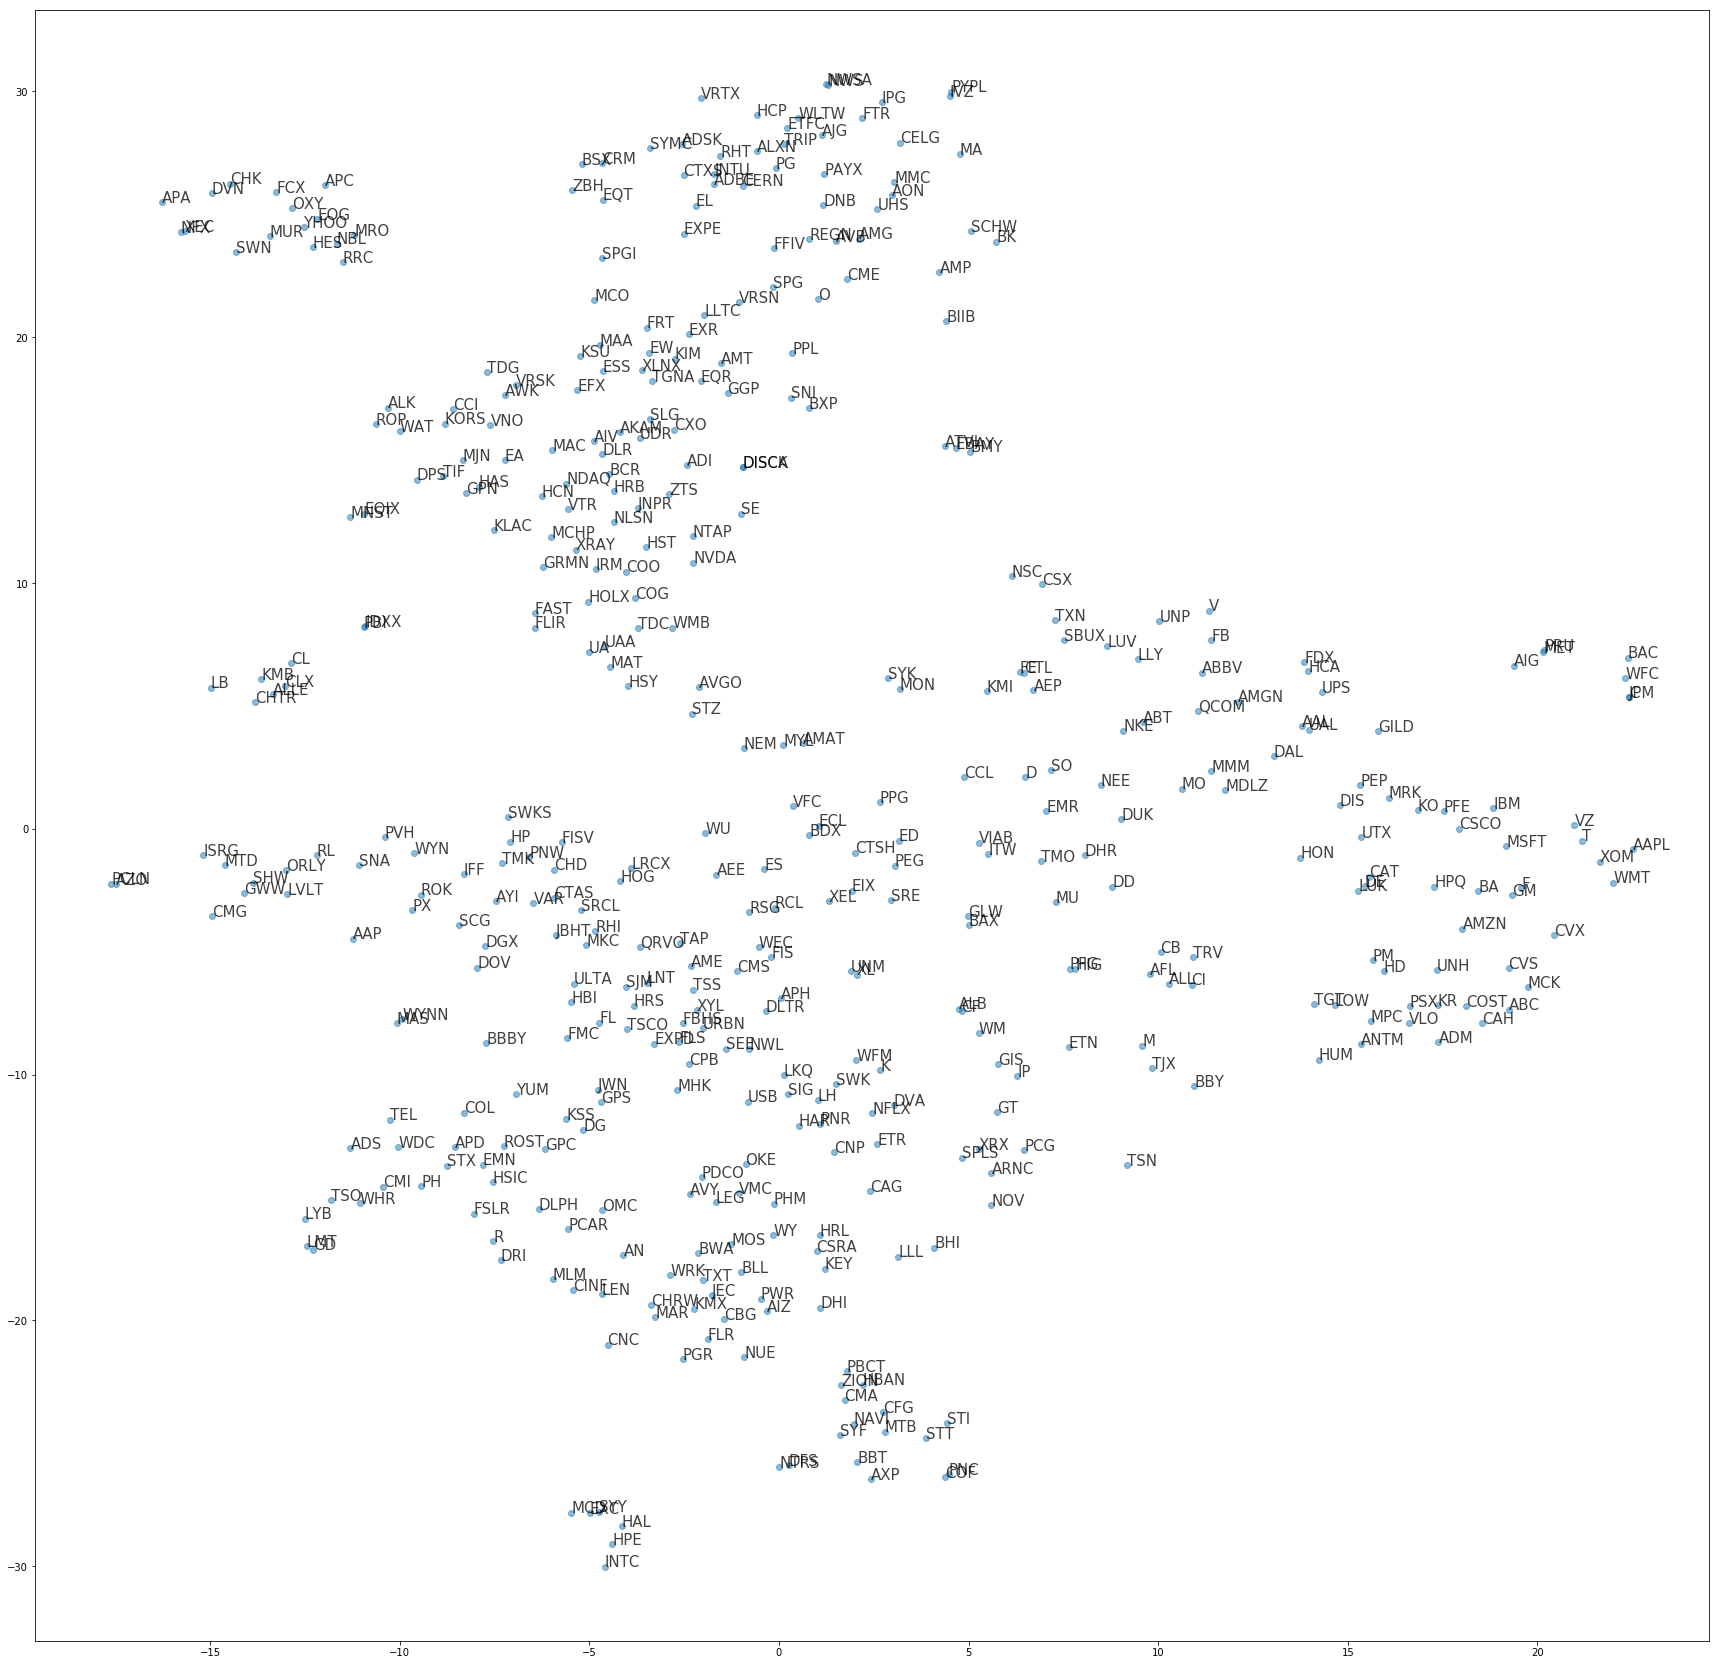

In [765]:
plt.figure(figsize=(30,30))


# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
for x, y, company in zip(xs, ys, company):
    plt.annotate(company, (x, y), fontsize=15, alpha=0.75)
#plt.figure(figsize=(18,20))
plt.show()

### Modelling

In [766]:
fundamental_1.head(4)

,Unnamed: 0,Ticker symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,2012,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,2013,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,2014,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,2015,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201


In [767]:
fundamental_5=fundamental_2.copy()

In [768]:
fundamental_5.drop(['For Year'],axis=1,inplace=True)

In [769]:
fundamental_5.head()

,Ticker symbol,Period Ending,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,Earnings Per Share,Security,GICS Sector,GICS Sub Industry
0,AAL,2012-12-31,23.0,58.0,1.435600e+10,-1.876000e+09,-1.813000e+09,197000000.0,2.485500e+10,1.049900e+10,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.0,-5.60,American Airlines Group,Industrials,Airlines
1,AAL,2013-12-31,67.0,59.0,1.572400e+10,-1.834000e+09,-1.324000e+09,660000000.0,2.674300e+10,1.101900e+10,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,5.0,-11.25,American Airlines Group,Industrials,Airlines
2,AAL,2014-12-31,143.0,63.0,2.703000e+10,2.882000e+09,4.099000e+09,-146000000.0,4.265000e+10,1.562000e+10,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,10.0,4.02,American Airlines Group,Industrials,Airlines
3,AAL,2015-12-31,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-604000000.0,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,11.39,American Airlines Group,Industrials,Airlines
4,AAP,2012-12-29,32.0,50.0,3.098036e+09,3.876700e+08,6.579150e+08,540210000.0,6.205003e+09,3.106967e+09,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,11.0,5.29,Advance Auto Parts,Consumer Discretionary,Automotive Retail


In [770]:
fundamental_5.shape

(1781, 20)

In [771]:
for col in ['GICS Sector','GICS Sub Industry']:
    fundamental_5[col]=fundamental_5[col].astype('category')

In [772]:
for col in ['GICS Sector','GICS Sub Industry']:
    fundamental_5[col]=fundamental_5[col].cat.codes

In [773]:
fundamental_5.head()

,Ticker symbol,Period Ending,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,Earnings Per Share,Security,GICS Sector,GICS Sub Industry
0,AAL,2012-12-31,23.0,58.0,1.435600e+10,-1.876000e+09,-1.813000e+09,197000000.0,2.485500e+10,1.049900e+10,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.0,-5.60,American Airlines Group,5,4
1,AAL,2013-12-31,67.0,59.0,1.572400e+10,-1.834000e+09,-1.324000e+09,660000000.0,2.674300e+10,1.101900e+10,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,5.0,-11.25,American Airlines Group,5,4
2,AAL,2014-12-31,143.0,63.0,2.703000e+10,2.882000e+09,4.099000e+09,-146000000.0,4.265000e+10,1.562000e+10,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,10.0,4.02,American Airlines Group,5,4
3,AAL,2015-12-31,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-604000000.0,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,11.39,American Airlines Group,5,4
4,AAP,2012-12-29,32.0,50.0,3.098036e+09,3.876700e+08,6.579150e+08,540210000.0,6.205003e+09,3.106967e+09,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,11.0,5.29,Advance Auto Parts,0,12


In [774]:
fundamental_5['trend']=np.where(fundamental_5['Earnings Per Share']>0, '1', '0')

In [775]:
fundamental_5['trend']=fundamental_5['trend'].astype('float64')

In [776]:
fundamental_5.drop(['Earnings Per Share','Security'],axis=1,inplace=True)

In [777]:
fundamental_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 19 columns):
Ticker symbol                       1781 non-null object
Period Ending                       1781 non-null datetime64[ns]
After Tax ROE                       1781 non-null float64
Gross Margin                        1781 non-null float64
Gross Profit                        1781 non-null float64
Net Income                          1781 non-null float64
Earnings Before Interest and Tax    1781 non-null float64
Net Cash Flow                       1781 non-null float64
Total Revenue                       1781 non-null float64
Cost of Revenue                     1781 non-null float64
Total Assets                        1781 non-null float64
Total Current Assets                1781 non-null float64
Total Current Liabilities           1781 non-null float64
Total Equity                        1781 non-null float64
Total Liabilities                   1781 non-null float64
Operating Margin 

In [778]:
fundamental_5.fillna(value='0',inplace=True)

In [779]:
fundamental_5.shape

(1781, 19)

In [780]:
fundamental_5.head()

,Ticker symbol,Period Ending,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,GICS Sector,GICS Sub Industry,trend
0,AAL,2012-12-31,23.0,58.0,1.435600e+10,-1.876000e+09,-1.813000e+09,197000000.0,2.485500e+10,1.049900e+10,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.0,5,4,0.0
1,AAL,2013-12-31,67.0,59.0,1.572400e+10,-1.834000e+09,-1.324000e+09,660000000.0,2.674300e+10,1.101900e+10,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,5.0,5,4,0.0
2,AAL,2014-12-31,143.0,63.0,2.703000e+10,2.882000e+09,4.099000e+09,-146000000.0,4.265000e+10,1.562000e+10,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,10.0,5,4,1.0
3,AAL,2015-12-31,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-604000000.0,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,5,4,1.0
4,AAP,2012-12-29,32.0,50.0,3.098036e+09,3.876700e+08,6.579150e+08,540210000.0,6.205003e+09,3.106967e+09,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,11.0,0,12,1.0


In [781]:
X=fundamental_5.iloc[:,2:18]
y=fundamental_5.trend

In [782]:
X.head()

,After Tax ROE,Gross Margin,Gross Profit,Net Income,Earnings Before Interest and Tax,Net Cash Flow,Total Revenue,Cost of Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Operating Margin,GICS Sector,GICS Sub Industry
0,23.0,58.0,1.435600e+10,-1.876000e+09,-1.813000e+09,197000000.0,2.485500e+10,1.049900e+10,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.0,5,4
1,67.0,59.0,1.572400e+10,-1.834000e+09,-1.324000e+09,660000000.0,2.674300e+10,1.101900e+10,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,5.0,5,4
2,143.0,63.0,2.703000e+10,2.882000e+09,4.099000e+09,-146000000.0,4.265000e+10,1.562000e+10,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,10.0,5,4
3,135.0,73.0,2.989400e+10,7.610000e+09,5.496000e+09,-604000000.0,4.099000e+10,1.109600e+10,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,15.0,5,4
4,32.0,50.0,3.098036e+09,3.876700e+08,6.579150e+08,540210000.0,6.205003e+09,3.106967e+09,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,11.0,0,12


In [783]:
SEED=1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Logistic Regression

In [808]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
#print('Train accuracy:',round(log_reg.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(log_reg.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_log_reg = MSE(y_test, y_pred)
rmse_log_reg = mse_log_reg**(1/2)
# Print rmse_lr
#print("Test set RMSE of log_reg: {:.2f}".format(rmse_log_reg))

MSE_CV_scores = - cross_val_score(log_reg, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = log_reg.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))


Test accuracy: 84.86
F-score: 91.36


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV RMSE: 0.39
Train RMSE: 0.38


### Support Vector Machine

In [809]:
mod_svc =SVC()
mod_svc.fit(X_train, y_train)
y_pred = mod_svc.predict(X_test)
#print('Train accuracy:',round(mod_svc.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(mod_svc.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_mod_svc = MSE(y_test, y_pred)
rmse_mod_svc = mse_mod_svc**(1/2)
# Print rmse_lr
#print("Test set RMSE of mod_svc: {:.2f}".format(rmse_mod_svc))

MSE_CV_scores = - cross_val_score(mod_svc, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = mod_svc.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test accuracy: 82.43
F-score: 90.33
CV RMSE: 0.41
Train RMSE: 0.05


### Linear SVC

In [810]:
mod_lin_svc =LinearSVC()
mod_lin_svc.fit(X_train, y_train)
y_pred = mod_lin_svc.predict(X_test)
#print('Train accuracy:',round(mod_lin_svc.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(mod_lin_svc.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_mod_lin_svc = MSE(y_test, y_pred)
rmse_mod_lin_svc = mse_mod_lin_svc**(1/2)
# Print rmse_lr
#print("Test set RMSE of mod_lin_svc: {:.2f}".format(rmse_mod_lin_svc))

MSE_CV_scores = - cross_val_score(mod_lin_svc, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = mod_lin_svc.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test accuracy: 79.63
F-score: 87.51
CV RMSE: 0.52
Train RMSE: 0.47


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [811]:
mod_knn =KNN()
mod_knn.fit(X_train, y_train)
y_pred = mod_knn.predict(X_test)
#print('Train accuracy:',round(mod_knn.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(mod_knn.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_mod_knn = MSE(y_test, y_pred)
rmse_mod_knn = mse_mod_knn**(1/2)
# Print rmse_lr
#print("Test set RMSE of mod_knn: {:.2f}".format(rmse_mod_knn))

MSE_CV_scores = - cross_val_score(mod_knn, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = mod_knn.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test accuracy: 82.8
F-score: 90.32
CV RMSE: 0.42
Train RMSE: 0.38


### DecisionTreeClassifier

In [812]:
mod_dec_tree =DecisionTreeClassifier(max_depth=5,min_samples_leaf=15)
mod_dec_tree.fit(X_train, y_train)
y_pred = mod_dec_tree.predict(X_test)
#print('Train accuracy:',round(mod_dec_tree.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(mod_dec_tree.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_mod_dec_tree = MSE(y_test, y_pred)
rmse_mod_dec_tree = mse_mod_dec_tree**(1/2)
# Print rmse_lr
#print("Test set RMSE of mod_dec_tree: {:.2f}".format(rmse_mod_dec_tree))

MSE_CV_scores = - cross_val_score(mod_dec_tree, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = mod_dec_tree.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test accuracy: 87.85
F-score: 92.99
CV RMSE: 0.36
Train RMSE: 0.34


### Random Forest

In [813]:
mod_ran =RandomForestClassifier(n_estimators=150,min_samples_leaf=12)
mod_ran.fit(X_train, y_train)
y_pred = mod_ran.predict(X_test)
#print('Train accuracy:',round(mod_ran.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(mod_ran.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))


mse_mod_ran = MSE(y_test, y_pred)
rmse_mod_ran = mse_mod_ran**(1/2)
# Print rmse_lr
#print("Test set RMSE of mod_ran: {:.2f}".format(rmse_mod_ran))

MSE_CV_scores = - cross_val_score(mod_ran, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = mod_ran.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test accuracy: 90.09
F-score: 94.31
CV RMSE: 0.35
Train RMSE: 0.35


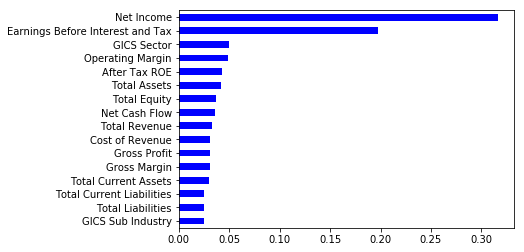

In [814]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(mod_ran.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

### Hard Voting

In [816]:
lr = LogisticRegression()
knn = KNN()
dt = DecisionTreeClassifier()
sv=SVC()
svl=LinearSVC()
rf=RandomForestClassifier()
# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt),
('Support Vector',sv),
('Linear SVC',svl),
('Random Forest',rf)]

vc = VotingClassifier(estimators=classifiers,voting='hard')
# Fit 'vc' to the traing set
vc.fit(X_train, y_train)
# Predict test set labels
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
#print('Train accuracy:',round(vc.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(vc.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))

mse_vc = MSE(y_test, y_pred)
rmse_vc = mse_vc**(1/2)

#print("Test set RMSE of vc: {:.2f}".format(rmse_vc))

MSE_CV_scores = - cross_val_score(vc, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = vc.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy: 88.41
F-score: 93.28
CV RMSE: 0.35
Train RMSE: 0.08


### Bagging

In [817]:
SEED=3
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier()
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)

#print('Train accuracy:',round(bc.score(X_train, y_train)* 100, 2))
print('Test accuracy:',round(bc.score(X_test, y_test)* 100, 2))
print('F-score:',round(f1_score(y_test,y_pred)* 100, 2))

mse_bc = MSE(y_test, y_pred)
rmse_bc = mse_bc**(1/2)

#print("Test set RMSE of vc: {:.2f}".format(rmse_vc))

MSE_CV_scores = - cross_val_score(bc, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = bc.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test accuracy: 85.98
F-score: 91.69
CV RMSE: 0.37
Train RMSE: 0.09


In [818]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest','Hard Voting',"Bagging"],
    
    'Score': [round(log_reg.score(X_test, y_test)* 100, 2), round(mod_svc.score(X_test, y_test)* 100, 2),
              round(mod_lin_svc.score(X_test, y_test)* 100, 2), 
              round(mod_knn.score(X_test, y_test)* 100, 2),  round(mod_dec_tree.score(X_test, y_test)* 100, 2),
              round(mod_ran.score(X_test, y_test)* 100, 2),round(vc.score(X_test, y_test)* 100, 2),
              round(bc.score(X_test, y_test)* 100, 2)]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,90.09
6,Hard Voting,88.41
4,Decision Tree,87.85
7,Bagging,85.98
0,Logistic Regression,84.86
3,KNN,82.80
1,Support Vector Machines,82.43
2,Linear SVC,79.63


# BANKRUPTCY Data Preparatation

In [862]:
fundamental_6=fundamental_1.copy()

In [863]:
fundamental_6.isnull().sum()

Unnamed: 0                                               0
Ticker symbol                                            0
Period Ending                                            0
Accounts Payable                                         0
Accounts Receivable                                      0
Add'l income/expense items                               0
After Tax ROE                                            0
Capital Expenditures                                     0
Capital Surplus                                          0
Cash Ratio                                             299
Cash and Cash Equivalents                                0
Changes in Inventories                                   0
Common Stocks                                            0
Cost of Revenue                                          0
Current Ratio                                          299
Deferred Asset Charges                                   0
Deferred Liability Charges                              

In [864]:
fundamental_6[['Cash Ratio']]=fundamental_6[['Cash Ratio']].fillna(value=fundamental_6['Cash Ratio'].mean())
fundamental_6[['Current Ratio']]=fundamental_6[['Current Ratio']].fillna(value=fundamental_6['Current Ratio'].mean())
fundamental_6[['Quick Ratio']]=fundamental_6[['Quick Ratio']].fillna(value=fundamental_6['Quick Ratio'].mean())

In [865]:
fundamental_6[['Earnings Per Share','Estimated Shares Outstanding']]=fundamental_6[['Earnings Per Share','Estimated Shares Outstanding']].fillna(value=0)


In [866]:
fundamental_6.drop(['Address of Headquarters','Date first added','CIK','SEC filings'],axis=1,inplace=True)

In [867]:
for col in ['GICS Sector','GICS Sub Industry']:
    fundamental_6[col]=fundamental_6[col].astype('category')

In [868]:
for col in ['GICS Sector','GICS Sub Industry']:
    fundamental_6[col]=fundamental_6[col].cat.codes

In [869]:
fundamental_6.to_csv("Bankrupcy Data.csv")